<a href="https://colab.research.google.com/github/Sreejan09/ML---4/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

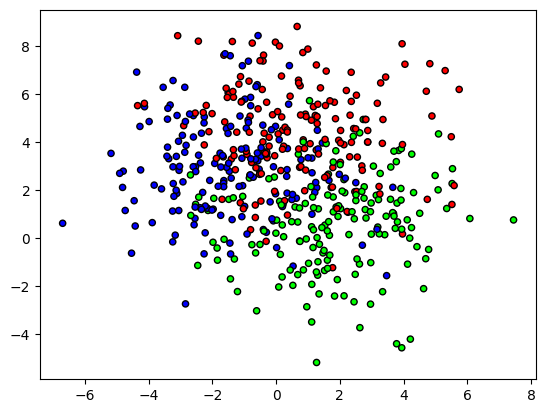

[1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0]
Accuracy: 0.65


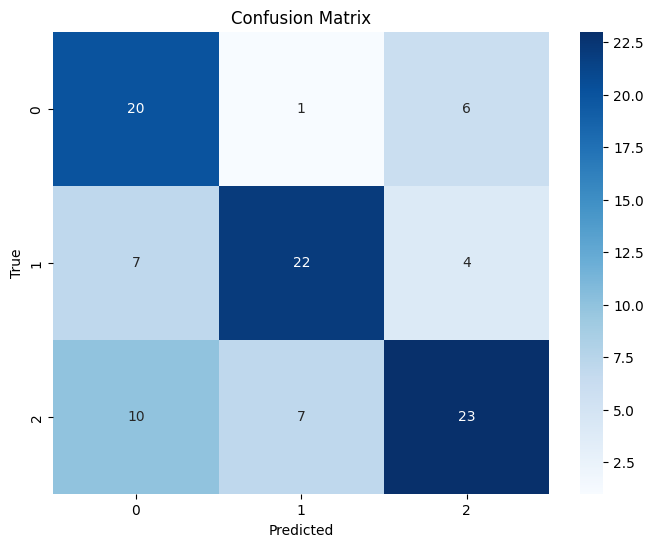

              precision    recall  f1-score   support

           0       0.54      0.74      0.62        27
           1       0.73      0.67      0.70        33
           2       0.70      0.57      0.63        40

    accuracy                           0.65       100
   macro avg       0.66      0.66      0.65       100
weighted avg       0.67      0.65      0.65       100



In [3]:
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
import time
import psutil  # for memory usage
from sklearn.model_selection import train_test_split  # Add import statement for train_test_split


#X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=2)

# Generating a random dataset with a pattern
X_pattern, y_pattern = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=0)

# Plotting the random dataset with pattern
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure()
plt.scatter(X_pattern[:, 0], X_pattern[:, 1], c=y_pattern, cmap=cmap, edgecolor='k', s=20)
plt.show()

# Splitting the random dataset into training and testing sets
X_train_pattern, X_test_pattern, y_train_pattern, y_test_pattern = train_test_split(X_pattern, y_pattern, test_size=0.2, random_state=1234)

# KNN implementation
clf_pattern = KNN(k=5)
clf_pattern.fit(X_train_pattern, y_train_pattern)
predictions_pattern = clf_pattern.predict(X_test_pattern)

print(predictions_pattern)

acc_pattern = np.sum(predictions_pattern == y_test_pattern) / len(y_test_pattern)
print("Accuracy:", acc_pattern)

# Generate confusion matrix
conf_matrix_pattern = confusion_matrix(y_test_pattern, predictions_pattern)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pattern, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y_pattern), yticklabels=np.unique(y_pattern))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test_pattern, predictions_pattern))

In [4]:

point_prediction = clf_pattern.predict([[-2.5, 5]])

# Get the color corresponding to the predicted class
predicted_class_color = cmap(point_prediction)

print("Predicted class for the point:", point_prediction)

Predicted class for the point: [2]


Predicted class for the point: [2]


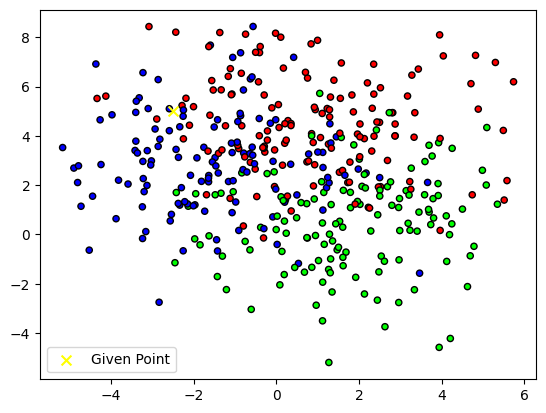

In [5]:

point_prediction = clf_pattern.predict([[-2.5, 5]])

# Get the color corresponding to the predicted class
predicted_class_color = cmap(point_prediction)

print("Predicted class for the point:", point_prediction)

# Plotting the training data with the given point
plt.figure()
plt.scatter(X_train_pattern[:, 0], X_train_pattern[:, 1], c=y_train_pattern, cmap=cmap, edgecolor='k', s=20)
plt.scatter(-2.5, 5, color='yellow', marker='x',s=50, label='Given Point')  # Plotting given point
plt.legend()
plt.show()

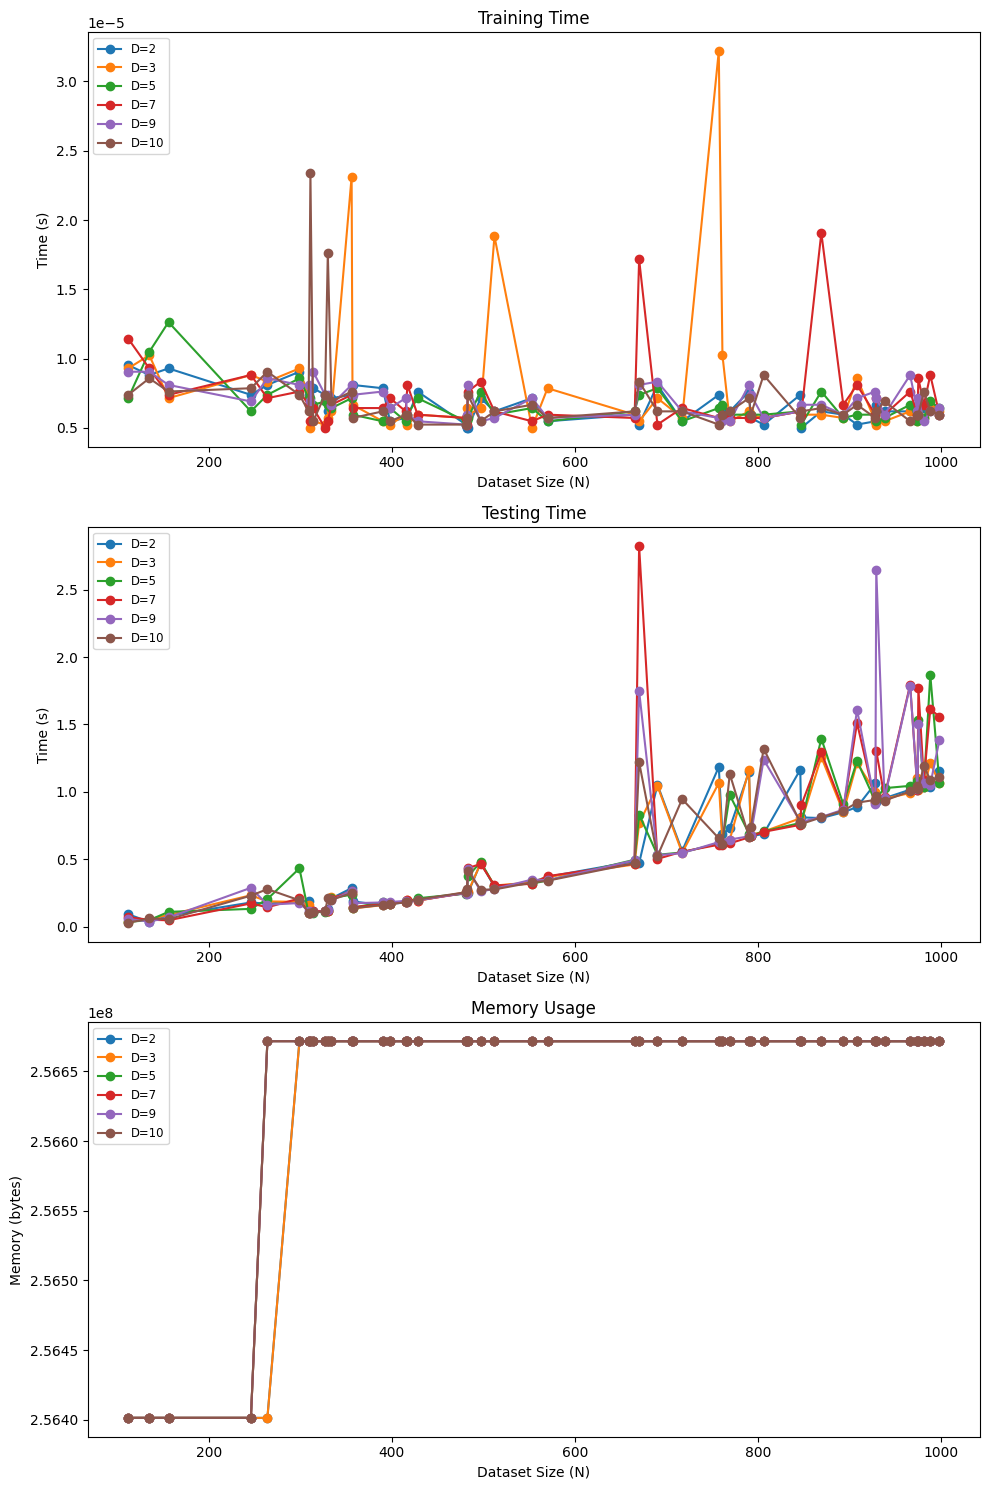

In [6]:
import time
import psutil  # for memory usage
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np

# Varying parameters
N_values = np.sort(np.random.randint(low=100, high=1000, size=50))
D_values = [2, 3, 5, 7, 9, 10]       # Number of dimensions
K = 5                         # Number of nearest neighbors

training_times = np.zeros((len(N_values), len(D_values)))
testing_times = np.zeros((len(N_values), len(D_values)))
memory_usages = np.zeros((len(N_values), len(D_values)))

for i, N in enumerate(N_values):
    for j, D in enumerate(D_values):
        # Generate random dataset with pattern
        X_pattern, y_pattern = make_blobs(n_samples=N, centers=3, n_features=D, cluster_std=2, random_state=0)

        # Split dataset into training and testing sets
        X_train_pattern, X_test_pattern, y_train_pattern, y_test_pattern = train_test_split(X_pattern, y_pattern, test_size=0.2, random_state=1234)

        # Measure training time
        start_time = time.time()
        clf_pattern = KNN(k=K)
        clf_pattern.fit(X_train_pattern, y_train_pattern)
        training_times[i, j] = time.time() - start_time

        # Measure testing time
        start_time = time.time()
        predictions_pattern = clf_pattern.predict(X_test_pattern)
        testing_times[i, j] = time.time() - start_time

        # Measure memory usage
        process = psutil.Process()
        memory_usages[i, j] = process.memory_info().rss  # in bytes

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot training time
for j, D in enumerate(D_values):
    axs[0].plot(N_values, training_times[:, j], marker='o', label=f'D={D}')
axs[0].set_title('Training Time')
axs[0].set_xlabel('Dataset Size (N)')
axs[0].set_ylabel('Time (s)')
axs[0].legend(fontsize='small', loc='upper left')

# Plot testing time
for j, D in enumerate(D_values):
    axs[1].plot(N_values, testing_times[:, j], marker='o', label=f'D={D}')
axs[1].set_title('Testing Time')
axs[1].set_xlabel('Dataset Size (N)')
axs[1].set_ylabel('Time (s)')
axs[1].legend(fontsize='small', loc='upper left')

# Plot memory usage
for j, D in enumerate(D_values):
    axs[2].plot(N_values, memory_usages[:, j], marker='o', label=f'D={D}')
axs[2].set_title('Memory Usage')
axs[2].set_xlabel('Dataset Size (N)')
axs[2].set_ylabel('Memory (bytes)')
axs[2].legend(fontsize='small', loc='upper left')

plt.tight_layout()
plt.show()